<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Aula** | Análise Exploratória de Dados com Python
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
17/02/2022

---

# **Tópicos**

<ol type="1">
  <li>Contexto;</li>
  <li>Análise Exploratória.</li>
</ol>

---

# **Aulas**

## 1\. Contexto

### **1.1. Spotify Wrapped** 

Campanha de marketing produzida pelo Spotify. Distriuída no começo de dezembro desde 2016, permite que seus usuários visualizem dados agregados da sua interação com o produto durante o último ano. 

> Vamos utilizar o **Python** e seus pacotes (códigos produzidos pela comunidade) para replicar o **Spotify Wrapped de 2021**.

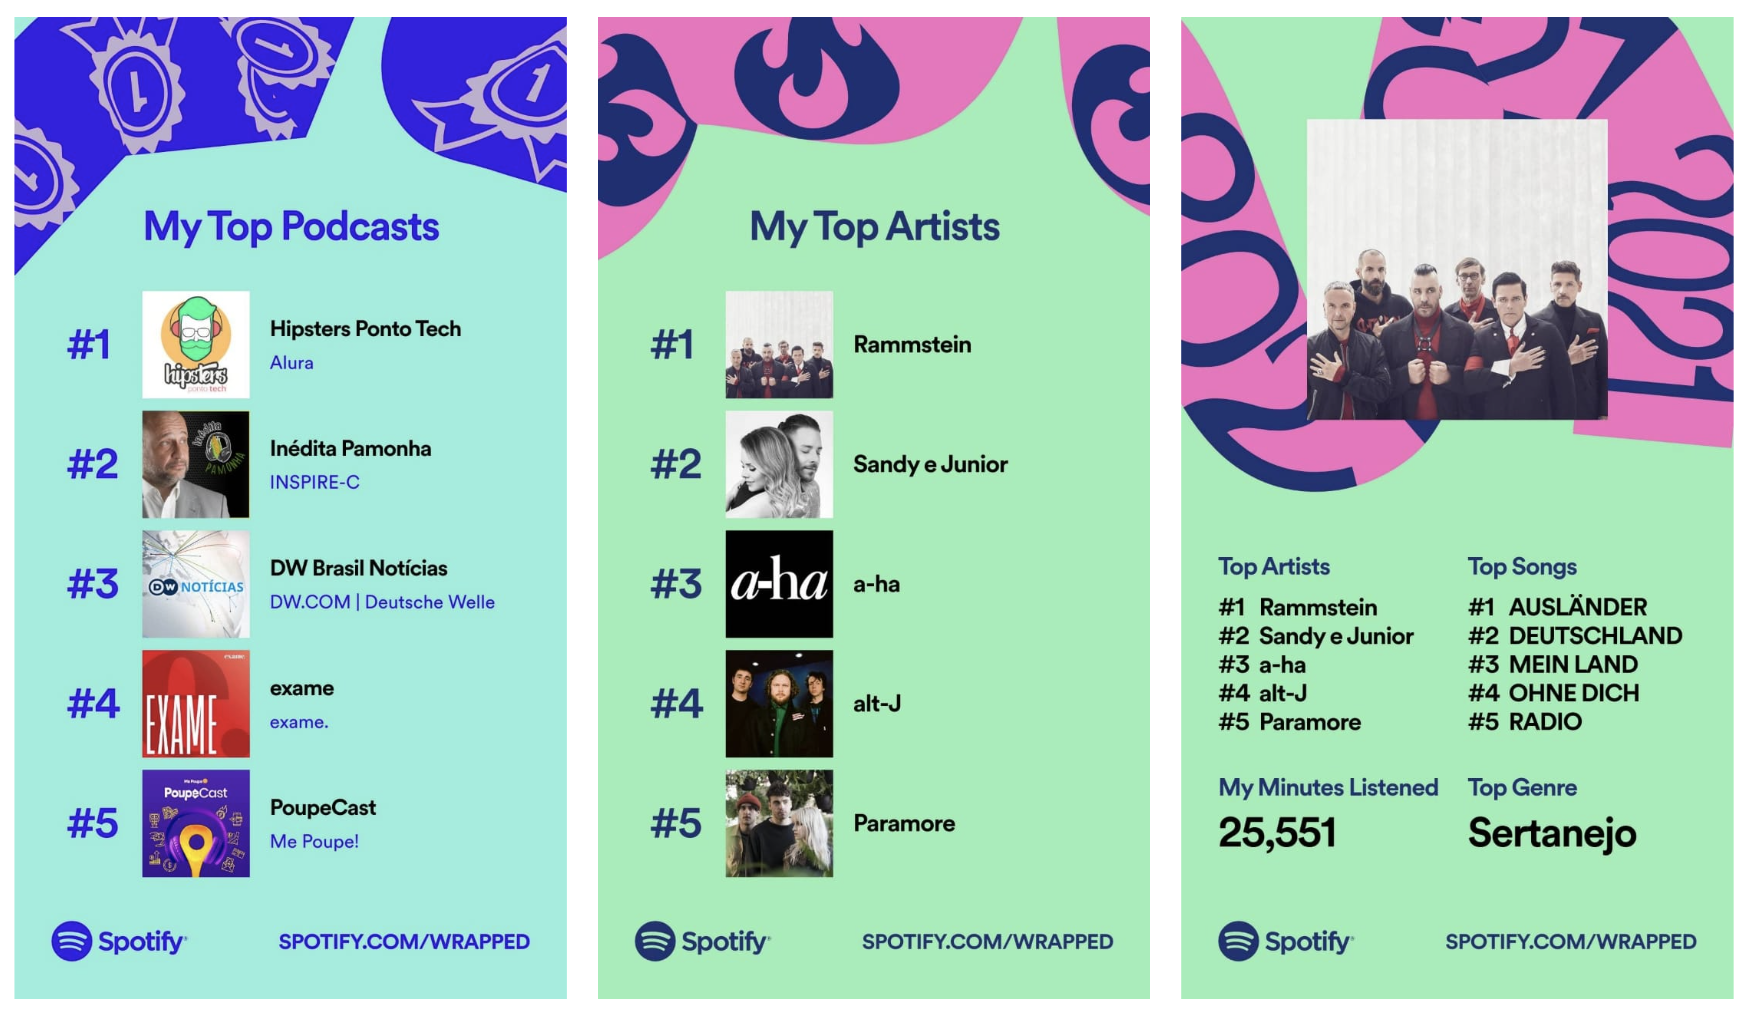

## 2\. Análise Exploratória

A análise exploratória de dados é o processo de analisar e resumir um conjunto de dados, através do uso de técnicas estatísticas e de visualização de dados, para a extração de *insights*. Talvez o **Excel** (Google Sheets, LibreOffice Calc, etc.) seja o software mais comum para conduzir esse tipo de atividade. Contudo, torna-se facilmente inadequado para o volume (100 MB) e a variedade (tabelas) dos dados atuais. Portanto, o uso de linguagens de programação para a análise de dados vem-se consolidando como padrão de mercado, e o **Python** é a mais utilizada para esse fim.


Nesta aula vamos utilizar o **Python** para conduzir algumas etapas da análise exploratória de dados:

*   Extração;
*   Exploração;
*   Limpeza;
*   Agregação;
*   Visualização;
*   *Storytelling*.

Vamos utilizar o `Pandas`, o pacote **Python** mais utilizado para processamento de dados.

In [ ]:
import pandas as pd

### **2.1. Extração**

Na etapa de extração buscamos os dados de interesse na fonte em que são produzidos.

> Para obter os seus dados do Spotify, bastas acessar os menus `Conta` -> `Configurações de privacidade` -> `Baixe seus dados`

O Spotify disponibiliza dados para seus usuários no formato JSON, exemplo:

```json
{
  "endTime" : "2022-02-03 10:19",
  "artistName" : "alt-J",
  "trackName" : "Matilda",
  "msPlayed" : 1393
}
```

Vamos ler os dados em um `DataFrame`, uma estrutura de dados tabular do `Pandas`.

In [ ]:
spotify = pd.read_json('./StreamingHistory0.json')
spotify = pd.concat([spotify, pd.read_json('./StreamingHistory1.json')], ignore_index=True)

Vamos então visualizar as 5 primeiras linhas do `DataFrame`.

In [ ]:
spotify.head(n=5)

### **2.2. Exploração**

Na etapa de exploração, buscamos entender as caraterísticas dos dados.

 - 5 primeiras linhas.

In [ ]:
spotify.head(n=10)

 - 5 últimas linhas.

In [ ]:
spotify.tail(n=5)

 - Número de linhas e colunas.

In [ ]:
spotify.shape

 - Nome das colunas.

In [ ]:
spotify.columns

 - Tipo do dado.

In [ ]:
spotify.dtypes

### **2.3. Limpeza**

Na etapa de limpeza, processamos os dados para que fiquem consistentes.

 - Remover linhas com o valor `msPlayed` igual a zero.

In [ ]:
spotify = spotify.query('msPlayed > 0')

In [ ]:
spotify.tail(n=5)

In [ ]:
spotify.shape

### **2.4. Agregação**

Na etapa de agregação, buscamos resumir os dados através de métricas estatísticas como soma, média, etc. para extrair *insights*.

 - Agregar o `DataFrame` por `artistName` utilizando uma métrica agregada de **soma** sobre a coluna `msPlayed`.

In [ ]:
spotify_agg = spotify[['artistName', 'msPlayed']].groupby('artistName').agg('sum').reset_index()

In [ ]:
spotify_agg.head(n=5)

 - Ordenar o `DataFrame` agregado pela coluna `msPlayed` de forma decrescente.

In [ ]:
spotify_agg = spotify_agg.sort_values(by='msPlayed', ascending=False)

In [ ]:
spotify_agg.head(n=10)

 - Selecionar os top 10 artistas mais tocados.

In [ ]:
spotify_agg_top_10 = spotify_agg[0:10]

In [ ]:
spotify_agg_top_10.head(n=20)

### **2.5. Visualização**

Na etapa de visualização, buscamos criar gráficos que melhor representem os *insights* gerados por agregações.

Vamos utilizar o `Seaborn`, um dos pacotes **Python** mais utilizado para visualização de dados.

In [ ]:
import seaborn as sns

 - Visualizar os 10 artistas mais tocados.

In [ ]:
with sns.axes_style('whitegrid'):

  chart = sns.barplot(data=spotify_agg_top_10, x='artistName', y='msPlayed')
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
  chart.set(title='Spotify Wrapped', xlabel='Artista', ylabel='Tempo tocado (ms)');
  chart.figure.set_size_inches(w=30/2.54, h=15/2.54)

### **2.6. *Storytelling***

Na etapa de *storytelling*, buscamos organizar os *insights* gerados em um formato de história para facilitar a transmissão do conhecimento.

> Exemplo:

Baseado na análise dos dados de reprodução de conteúdo do Spotify do usuário **xyz**, extraiu-se os top 10 artista mais ouvidos no último ano, sendo que:

 - 3 são *podcasts* sobre notícias, filosofia e tecnologia;
 - 7 são artistas dos gêneros *rock*, *pop* e *indie*.

Nota-se também um grande recorrência sobre a banda de *rock* alemã Rammstein, sendo esta ouvida aproximadamente 3 vezes mais que o segundo colocado, o *podcast* da agência de notícias alemã DW Brasil.

Conclui-se então que o usuário **xyz** é eclético com uma forte preferência por conteúdos relacionados com a Alemanha e a língua alemã, pode-se ainda sugerir que esteja utilizando o Spotify para aumentar a sua exposião a cultura e ao idioma da Alemanha.

Portanto recomenda-se aumentar o engajamento do usuário com a plataforma através da recomendação de músicas de artistas que cantem em alemão e *podcasts* sobre a cultura e a vida na Alemanha. 